Note: Handling Imbalanced Dataset without SMOTE using multiple Algorithms and hyper parameter tuning with grid search and random search Handling Imbalanced Dataset with SMOTE using multiple Algorithms and hyper parameter tuning with grid search and random search

This file covers following models :
1.   XGBoost
2.   Naive Bayes
3.   Linear Regression


Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Data Preparartion

In [ ]:
file = "crx.data"
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Class']
data = pd.read_csv(file, names=column_names, sep=',', na_values='?')
data = data.replace('?', np.nan)
data.dropna(inplace=True)
#data.drop_duplicates(inplace=True)
print(data.head())
# print(data.columns)
data.shape

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 Class
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0     +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560     +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824     +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3     +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0     +


(653, 16)

In [ ]:
from os import replace
# Separate features and target
replace_map = {'+': 1, '-': 0}
data['Class'] = data['Class'].replace(replace_map)

<ipython-input-3-6a55f5a09167>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Class'] = data['Class'].replace(replace_map)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    float64
 14  A15     653 non-null    int64  
 15  Class   653 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.7+ KB


In [ ]:
# Fill missing values with the most frequent value for simplicity
data.fillna(data.mode().iloc[0], inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [ ]:
# Convert categorical columns to numerical using dummy encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,A2,A3,A8,A11,A14,A15,Class,A1_b,A4_u,A4_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,1,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,58.67,4.460,3.04,6,43.0,560,1,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,24.50,0.500,1.50,0,280.0,824,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,27.83,1.540,3.75,5,100.0,3,1,True,True,False,...,False,False,False,True,False,True,True,True,False,False
4,20.17,5.625,1.71,0,120.0,0,1,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
# Normalize or standardize numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Or MinMaxScaler()
tmp = scaler.fit_transform(data[['A2','A3','A8','A11', 'A14','A15']])
data[['A2','A3','A8','A11', 'A14','A15']] = tmp
data = pd.DataFrame(data, columns= data.columns)

Detect X and Y

In [ ]:
# Detect X and y
target_column = data.columns[-1]  # Automatically detects the last column
feature = data.columns[:-1]  # Automatically detects the column

X = data[feature]
y = data[target_column].astype(int)



Train-Test Split

In [ ]:
# Step 2: Train-Test Split
print("\nStep 2: Splitting the data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(f"Class distribution in training set: {dict(zip(unique_train, counts_train))}")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(f"Class distribution in testing set: {dict(zip(unique_test, counts_test))}")


Step 2: Splitting the data into training and testing sets
Class distribution in training set: {0: 418, 1: 39}
Class distribution in testing set: {0: 182, 1: 14}


xgboost


Training XGBoost model...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       182
           1       0.45      0.36      0.40        14

    accuracy                           0.92       196
   macro avg       0.70      0.66      0.68       196
weighted avg       0.92      0.92      0.92       196

XGBoost Accuracy: 0.92


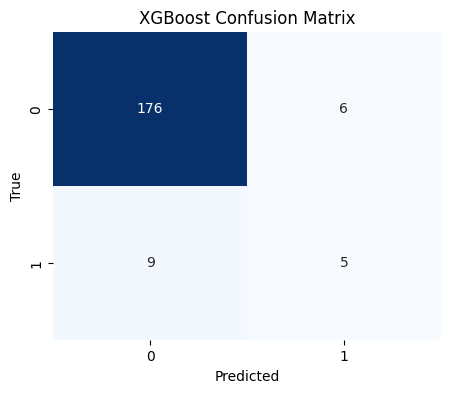

True Negatives (TN): 176, False Positives (FP): 6
False Negatives (FN): 9, True Positives (TP): 5


In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

print("\nTraining XGBoost model...")
xgb_model = XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Results
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_xgb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


xgboost hyperparameter tunning - random search


Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:44:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       182
           1       0.50      0.07      0.12        14

    accuracy                           0.93       196
   macro avg       0.72      0.53      0.54       196
weighted avg       0.90      0.93      0.90       196

Best Model Accuracy: 0.93


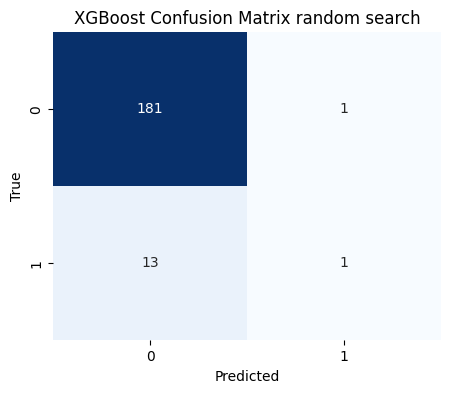

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],  # Number of trees
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
#     'max_depth': [3, 5, 7, 10],  # Maximum depth of a tree
#     'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
#     'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
#     'gamma': [0, 1, 5],  # Minimum loss reduction required for split
#     'reg_alpha': [0, 0.1, 1],  # L1 regularization
#     'reg_lambda': [1, 2, 5]  # L2 regularization
# }
param_grid = {
    'n_estimators': [25, 50, 100, 200, 400],  # More trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Smaller steps for better learning
    'max_depth': [5, 7, 10, 15],  # Broader range for tree depth
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 1, 5, 10],  # Minimum loss reduction for split
    'reg_alpha': [0, 0.1, 0.5, 1],  # Regularization to reduce overfitting
    'reg_lambda': [1, 2, 5, 10]  # Regularization to reduce overfitting
}

# Create the base model
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
print("\nStarting hyperparameter tuning...")
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Evaluate the best model on the test set
best_predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))
print(f"Best Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix random search')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


xgboost hyperparameter tunning - grid search


Starting hyperparameter tuning with training data...
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       182
           1       0.44      0.29      0.35        14

    accuracy                           0.92       196
   macro avg       0.70      0.63      0.65       196
weighted avg       0.91      0.92      0.92       196

Best Model Accuracy: 0.92


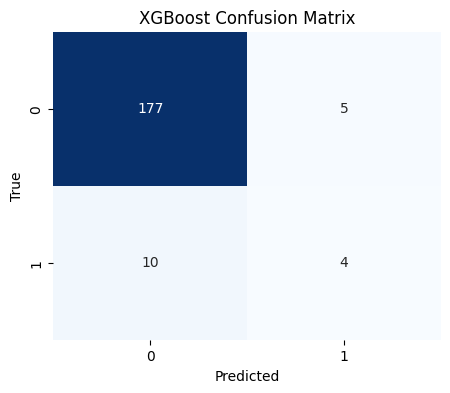

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the parameter grid (reduced combinations for demonstration)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}

# Step 2: Initialize the XGBoost model
xgb = XGBClassifier(eval_metric='logloss')

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit GridSearchCV on the training data
print("\nStarting hyperparameter tuning with training data...")
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

best_predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))
print(f"Best Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Apply smote

Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Training XGBoost model on balanced data...

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       182
           1       0.47      0.50      0.48        14

    accuracy                           0.92       196
   macro avg       0.71      0.73      0.72       196
weighted avg       0.93      0.92      0.92       196

XGBoost Accuracy: 0.92


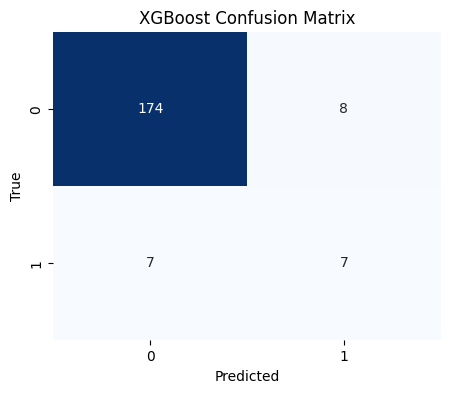

True Negatives (TN): 174, False Positives (FP): 8
False Negatives (FN): 7, True Positives (TP): 7


In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

#Initialize and Train the XGBoost Model
xgb = XGBClassifier(eval_metric='logloss')  # Default hyperparameters
print("\nTraining XGBoost model on balanced data...")
xgb.fit(X_train_balanced, y_train_balanced)

 #Evaluate the Model on Test Data
xgb_predictions = xgb.predict(X_test)
accuracy = accuracy_score(y_test, xgb_predictions)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_predictions))
print(f"XGBoost Accuracy: {accuracy:.2f}")

#  Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#  Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_xgb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


xgboost smote hyperparameter tunning - random search

Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:45:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       182
           1       0.39      0.50      0.44        14

    accuracy                           0.91       196
   macro avg       0.67      0.72      0.69       196
weighted avg       0.92      0.91      0.91       196

Best Model Accuracy: 0.91


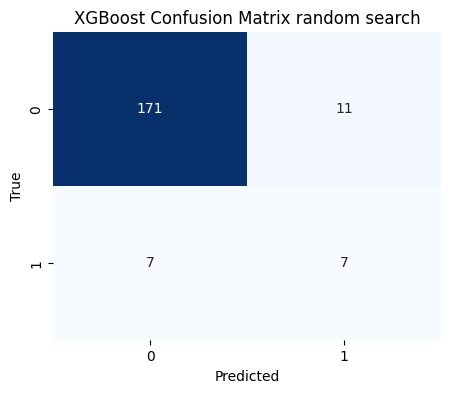

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],  # Number of trees
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
#     'max_depth': [3, 5, 7, 10],  # Maximum depth of a tree
#     'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
#     'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
#     'gamma': [0, 1, 5],  # Minimum loss reduction required for split
#     'reg_alpha': [0, 0.1, 1],  # L1 regularization
#     'reg_lambda': [1, 2, 5]  # L2 regularization
# }
param_grid = {
    'n_estimators': [25, 50, 100, 200, 400],  # More trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Smaller steps for better learning
    'max_depth': [5, 7, 10, 15],  # Broader range for tree depth
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 1, 5, 10],  # Minimum loss reduction for split
    'reg_alpha': [0, 0.1, 0.5, 1],  # Regularization to reduce overfitting
    'reg_lambda': [1, 2, 5, 10]  # Regularization to reduce overfitting
}

# Create the base model
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
print("\nStarting hyperparameter tuning...")
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Evaluate the best model on the test set
best_predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))
print(f"Best Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix random search')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


xgboost smote hyperparameter tunning - grid search

Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Starting hyperparameter tuning with balanced dataset...
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.8}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       182
           1       0.39      0.50      0.44        14

    accuracy                           0.91       196
   macro avg       0.67      0.72      0.69       196
weighted avg       0.92      0.91      0.91       196

Best Model Accuracy: 0.91


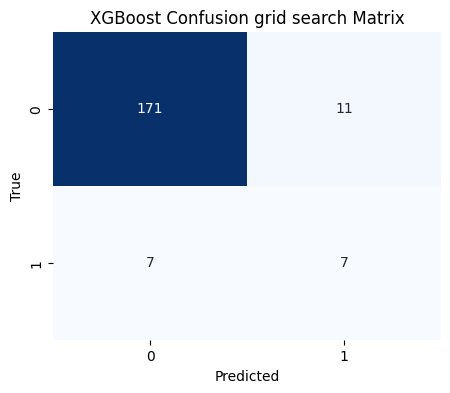

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 2: Define the parameter grid (reduced combinations for demonstration)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}

# Step 3: Initialize the XGBoost model
xgb = XGBClassifier(eval_metric='logloss')

# Step 4: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Step 5: Fit GridSearchCV on the balanced training data
print("\nStarting hyperparameter tuning with balanced dataset...")
grid_search.fit(X_train_balanced, y_train_balanced)

# Step 6: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

best_predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))
print(f"Best Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion grid search Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


navie bayes


Training Naive Bayes model...

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       182
           1       0.12      1.00      0.22        14

    accuracy                           0.49       196
   macro avg       0.56      0.73      0.42       196
weighted avg       0.94      0.49      0.59       196

Naive Bayes Accuracy: 0.49


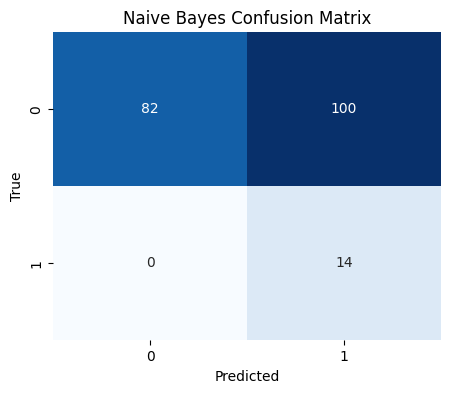

True Negatives (TN): 82, False Positives (FP): 100
False Negatives (FN): 0, True Positives (TP): 14


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Naive Bayes model
print("\nTraining Naive Bayes model...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

# Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


naive bayes with random search


Starting hyperparameter tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'var_smoothing': 1e-08}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       182
           1       0.12      1.00      0.22        14

    accuracy                           0.49       196
   macro avg       0.56      0.73      0.42       196
weighted avg       0.94      0.49      0.59       196

Naive Bayes Accuracy: 0.49


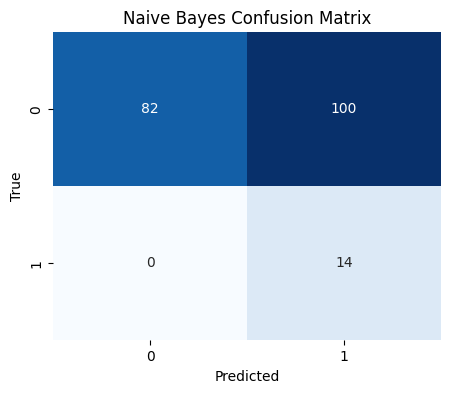

True Negatives (TN): 82, False Positives (FP): 100
False Negatives (FN): 0, True Positives (TP): 14


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for GaussianNB
}

# Step 2: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 3: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit RandomizedSearchCV on training data
print("\nStarting hyperparameter tuning...")
random_search.fit(X_train, y_train)

# Step 5: Evaluate the best model on the test set
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Make predictions
nb_predictions = best_model.predict(X_test)

# Classification report and accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Step 6: Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


naive bayes with grid search


Starting hyperparameter tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters: {'var_smoothing': 1e-08}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       182
           1       0.12      1.00      0.22        14

    accuracy                           0.49       196
   macro avg       0.56      0.73      0.42       196
weighted avg       0.94      0.49      0.59       196

Naive Bayes Accuracy: 0.49


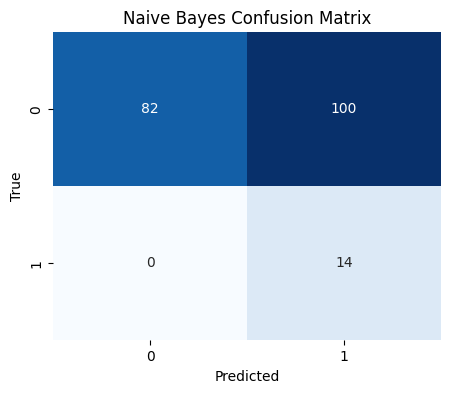

True Negatives (TN): 82, False Positives (FP): 100
False Negatives (FN): 0, True Positives (TP): 14


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for GaussianNB
}

# Step 2: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit GridSearchCV on training data
print("\nStarting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Make predictions
nb_predictions = best_model.predict(X_test)

# Classification report and accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Step 6: Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


naive bayes with smote

Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Training Naive Bayes model...

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64       182
           1       0.13      1.00      0.22        14

    accuracy                           0.51       196
   macro avg       0.56      0.73      0.43       196
weighted avg       0.94      0.51      0.61       196

Naive Bayes Accuracy: 0.51


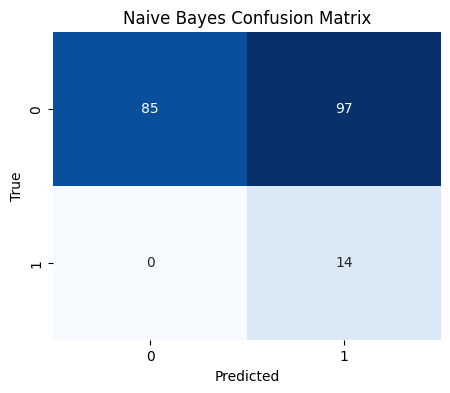

True Negatives (TN): 85, False Positives (FP): 97
False Negatives (FN): 0, True Positives (TP): 14


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 2: Train the Naive Bayes Model
print("\nTraining Naive Bayes model...")
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# Step 3: Evaluate the Model on Test Data
nb_predictions = nb_model.predict(X_test)

# Classification report and accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Step 4: Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


naive bayes smote hyper parameter tuning grid search

Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Starting hyperparameter tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters: {'var_smoothing': 1e-06}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       182
           1       0.13      1.00      0.23        14

    accuracy                           0.52       196
   macro avg       0.56      0.74      0.44       196
weighted avg       0.94      0.52      0.62       196

Naive Bayes Accuracy: 0.52


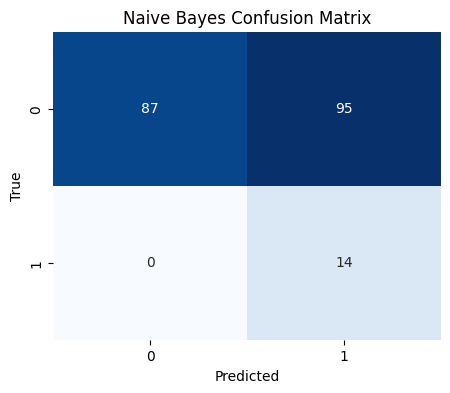

True Negatives (TN): 87, False Positives (FP): 95
False Negatives (FN): 0, True Positives (TP): 14


In [ ]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 1: Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for GaussianNB
}

# Step 2: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Step 4: Fit GridSearchCV on training data
print("\nStarting hyperparameter tuning...")
grid_search.fit(X_train_balanced, y_train_balanced)

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Make predictions
nb_predictions = best_model.predict(X_test)

# Classification report and accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Step 6: Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


naive bayes smote hyper parameter tuning random search

Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Starting hyperparameter tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'var_smoothing': 1e-06}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       182
           1       0.13      1.00      0.23        14

    accuracy                           0.52       196
   macro avg       0.56      0.74      0.44       196
weighted avg       0.94      0.52      0.62       196

Naive Bayes Accuracy: 0.52


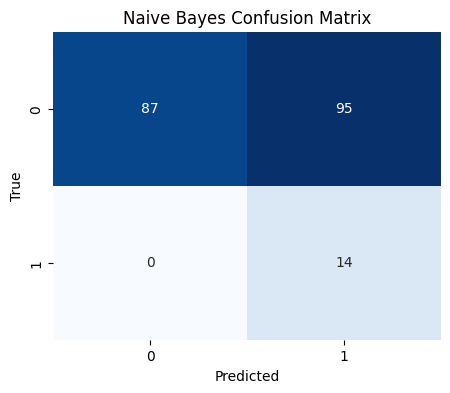

True Negatives (TN): 87, False Positives (FP): 95
False Negatives (FN): 0, True Positives (TP): 14


In [ ]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 1: Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for GaussianNB
}

# Step 2: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 3: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit RandomizedSearchCV on training data
print("\nStarting hyperparameter tuning...")
random_search.fit(X_train_balanced, y_train_balanced)

# Step 5: Evaluate the best model on the test set
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Make predictions
nb_predictions = best_model.predict(X_test)

# Classification report and accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Step 6: Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract and Print Confusion Matrix Metrics
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives (TN): {tn}, False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}, True Positives (TP): {tp}")


linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Define and Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 2: Make Predictions on Test Data
linear_predictions = linear_model.predict(X_test)

# Step 3: Evaluate the Model
mse = mean_squared_error(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)

print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")






Linear Regression Evaluation:
Mean Squared Error (MSE): 0.0614
Mean Absolute Error (MAE): 0.1522


linear regression with gridsearch cv

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 1: Define a Pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures()),  # Polynomial features
    ('linear', LinearRegression())  # Linear regression model
])

# Step 2: Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3],  # Degree of polynomial features
    'poly__include_bias': [True, False],  # Include bias term in polynomial features
    'linear__fit_intercept': [True, False],  # Whether to fit the intercept
}

# Step 3: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring based on negative MSE
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Step 4: Extract the best parameters and model
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Parameters for Linear Regression Pipeline:")
print(best_params)

# Step 5: Evaluate the best model on the test set
linear_predictions = best_pipeline.predict(X_test)

# Compute MSE and MAE
mse = mean_squared_error(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)
print("\nEvaluation Metrics for Linear Regression Pipeline:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 6: Display Grid Search Results
grid_search_result = pd.DataFrame(grid_search.cv_results_)[['param_poly__degree', 'param_poly__include_bias', 'param_linear__fit_intercept', 'mean_test_score']]
grid_search_result['mean_test_score'] = -grid_search_result['mean_test_score']  # Convert negative MSE to positive
print("\nGrid Search Results:")
print(grid_search_result)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters for Linear Regression Pipeline:
{'linear__fit_intercept': True, 'poly__degree': 1, 'poly__include_bias': True}

Evaluation Metrics for Linear Regression Pipeline:
Mean Squared Error (MSE): 0.0614
Mean Absolute Error (MAE): 0.1522

Grid Search Results:
    param_poly__degree  param_poly__include_bias  param_linear__fit_intercept  \
0                    1                      True                         True   
1                    1                     False                         True   
2                    2                      True                         True   
3                    2                     False                         True   
4                    3                      True                         True   
5                    3                     False                         True   
6                    1                      True                        False   
7                    1                     False                        False   
8 

linear regression with ramdomizesearch cv

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 1: Define a Pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures()),  # Polynomial features
    ('linear', LinearRegression())  # Linear regression model
])

# Step 2: Define the hyperparameter grid
param_dist = {
    'poly__degree': [1, 2, 3],  # Degree of polynomial features
    'poly__include_bias': [True, False],  # Include bias term in polynomial features
    'linear__fit_intercept': [True, False],  # Whether to fit the intercept
}

# Step 3: Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring based on negative MSE
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Step 4: Extract the best parameters and model
best_pipeline = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters for Linear Regression Pipeline:")
print(best_params)

# Step 5: Evaluate the best model on the test set
linear_predictions = best_pipeline.predict(X_test)

# Compute MSE and MAE
mse = mean_squared_error(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)
print("\nEvaluation Metrics for Linear Regression Pipeline:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 6: Display Random Search Results
random_search_result = pd.DataFrame(random_search.cv_results_)[['param_poly__degree', 'param_poly__include_bias', 'param_linear__fit_intercept', 'mean_test_score']]
random_search_result['mean_test_score'] = -random_search_result['mean_test_score']  # Convert negative MS


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters for Linear Regression Pipeline:
{'poly__include_bias': True, 'poly__degree': 1, 'linear__fit_intercept': True}

Evaluation Metrics for Linear Regression Pipeline:
Mean Squared Error (MSE): 0.0614
Mean Absolute Error (MAE): 0.1522


apply smote linear

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 2: Define and Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_balanced, y_train_balanced)

# Step 3: Make Predictions on Test Data
lr_predictions = lr_model.predict(X_test)

# Step 4: Evaluate the Model
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)

print("\nLinear Regression Evaluation with SMOTE:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}

Linear Regression Evaluation with SMOTE:
Mean Squared Error (MSE): 0.1110
Mean Absolute Error (MAE): 0.2704


linear smote tuning with grid search

In [ ]:
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 1: Define a Pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures()),  # Polynomial features
    ('linear', LinearRegression())  # Linear regression model
])

# Step 2: Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3],  # Degree of polynomial features
    'poly__include_bias': [True, False],  # Include bias term in polynomial features
    'linear__fit_intercept': [True, False],  # Whether to fit the intercept
}

# Step 3: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring based on negative MSE
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_balanced, y_train_balanced)

# Step 4: Extract the best parameters and model
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Parameters for Linear Regression Pipeline:")
print(best_params)

# Step 5: Evaluate the best model on the test set
linear_predictions = best_pipeline.predict(X_test)

# Compute MSE and MAE
mse = mean_squared_error(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)
print("\nEvaluation Metrics for Linear Regression Pipeline:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 6: Display Grid Search Results
grid_search_result = pd.DataFrame(grid_search.cv_results_)[['param_poly__degree', 'param_poly__include_bias', 'param_linear__fit_intercept', 'mean_test_score']]
grid_search_result['mean_test_score'] = -grid_search_result['mean_test_score']  # Convert negative MSE to positive
print("\nGrid Search Results:")
print(grid_search_result)


Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters for Linear Regression Pipeline:
{'linear__fit_intercept': True, 'poly__degree': 1, 'poly__include_bias': True}

Evaluation Metrics for Linear Regression Pipeline:
Mean Squared Error (MSE): 0.1110
Mean Absolute Error (MAE): 0.2704

Grid Search Results:
    param_poly__degree  param_poly__include_bias  param_linear__fit_intercept  \
0                    1                      True                         True   
1                    1                     False                         True   
2                    2                      True                         True   
3                    2                     False                         True   
4                    3                      True                         True   
5                    3                     False                         True   
6               

linear smote tuning with random search

In [ ]:
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd


# Apply SMOTE to balance the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(f"Balanced Class Distribution: {dict(zip(unique, counts))}")

# Step 1: Define a Pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures()),  # Polynomial features
    ('linear', LinearRegression())  # Linear regression model
])

# Step 2: Define the hyperparameter grid
param_dist = {
    'poly__degree': [1, 2, 3],  # Degree of polynomial features
    'poly__include_bias': [True, False],  # Include bias term in polynomial features
    'linear__fit_intercept': [True, False],  # Whether to fit the intercept
}

# Step 3: Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring based on negative MSE
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_balanced, y_train_balanced)

# Step 4: Extract the best parameters and model
best_pipeline = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters for Linear Regression Pipeline:")
print(best_params)

# Step 5: Evaluate the best model on the test set
linear_predictions = best_pipeline.predict(X_test)

# Compute MSE and MAE
mse = mean_squared_error(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)
print("\nEvaluation Metrics for Linear Regression Pipeline:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 6: Display Random Search Results
random_search_result = pd.DataFrame(random_search.cv_results_)[['param_poly__degree', 'param_poly__include_bias', 'param_linear__fit_intercept', 'mean_test_score']]
random_search_result['mean_test_score'] = -random_search_result['mean_test_score']  # Convert negative MS


Applying SMOTE to balance the dataset...
Balanced Class Distribution: {0: 418, 1: 418}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters for Linear Regression Pipeline:
{'poly__include_bias': True, 'poly__degree': 1, 'linear__fit_intercept': True}

Evaluation Metrics for Linear Regression Pipeline:
Mean Squared Error (MSE): 0.1110
Mean Absolute Error (MAE): 0.2704


For Visualization, metrics data is collected from two files and inputed in the code. the files are (ML_ProjectModels1 and ML_ProjectModels2-Current File)

Visualization for Baseline Models without and with smote









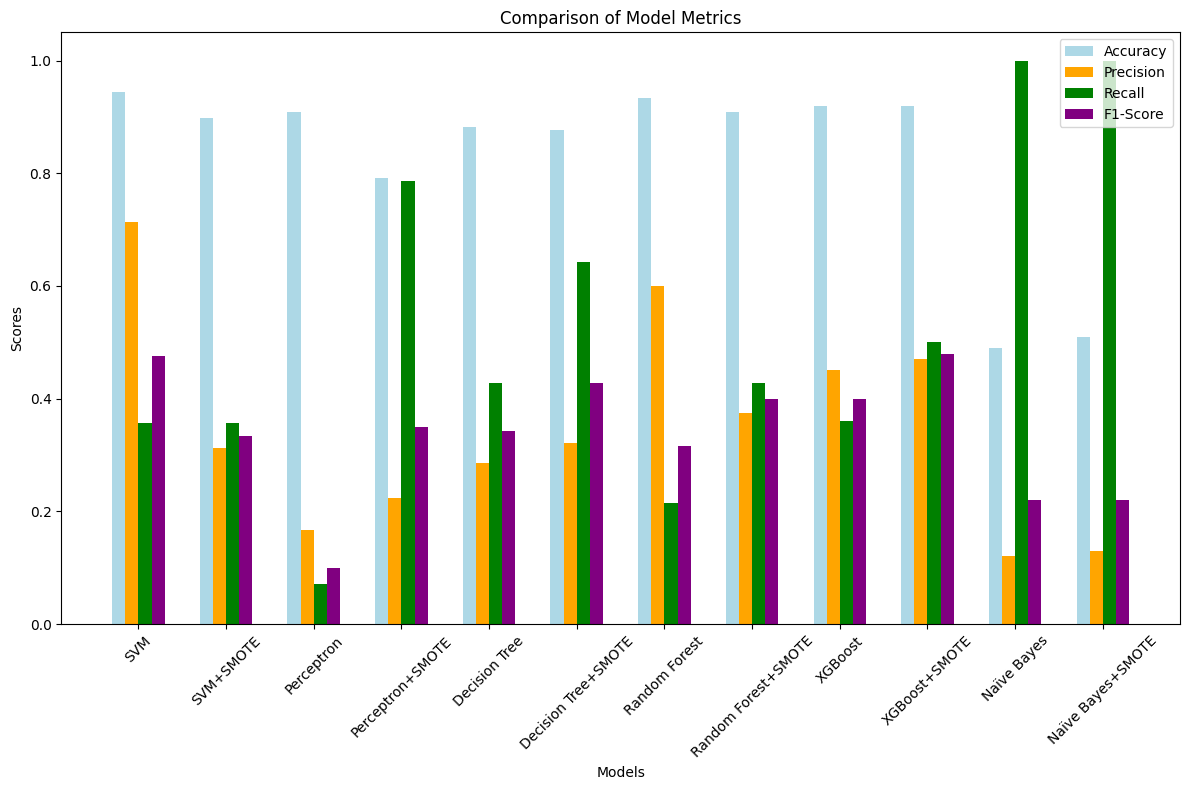

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    'SVM', 'SVM+SMOTE', 'Perceptron', 'Perceptron+SMOTE',
    'Decision Tree', 'Decision Tree+SMOTE', 'Random Forest', 'Random Forest+SMOTE',
    'XGBoost', 'XGBoost+SMOTE', 'Naïve Bayes', 'Naïve Bayes+SMOTE'
]
accuracy = [0.9438, 0.8979, 0.9081, 0.7908, 0.8826, 0.8775, 0.9336, 0.9081, 0.92, 0.92, 0.49, 0.51]
precision = [0.7142, 0.3125, 0.1666, 0.2244, 0.2857, 0.3214, 0.6000, 0.3750, 0.45, 0.47, 0.12, 0.13]
recall = [0.3571, 0.3571, 0.0714, 0.7857, 0.4285, 0.6428, 0.2142, 0.4285, 0.36, 0.50, 1.00, 1.00]
f1score = [0.4761, 0.3333, 0.1000, 0.3492, 0.3428, 0.4285, 0.3157, 0.4000, 0.40, 0.48, 0.22, 0.22]

x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='lightblue')
ax.bar(x - 0.5*width, precision, width, label='Precision', color='orange')
ax.bar(x + 0.5*width, recall, width, label='Recall', color='green')
ax.bar(x + 1.5*width, f1score, width, label='F1-Score', color='purple')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()


Visualization for Tuned Models without and with smote using GridSearch


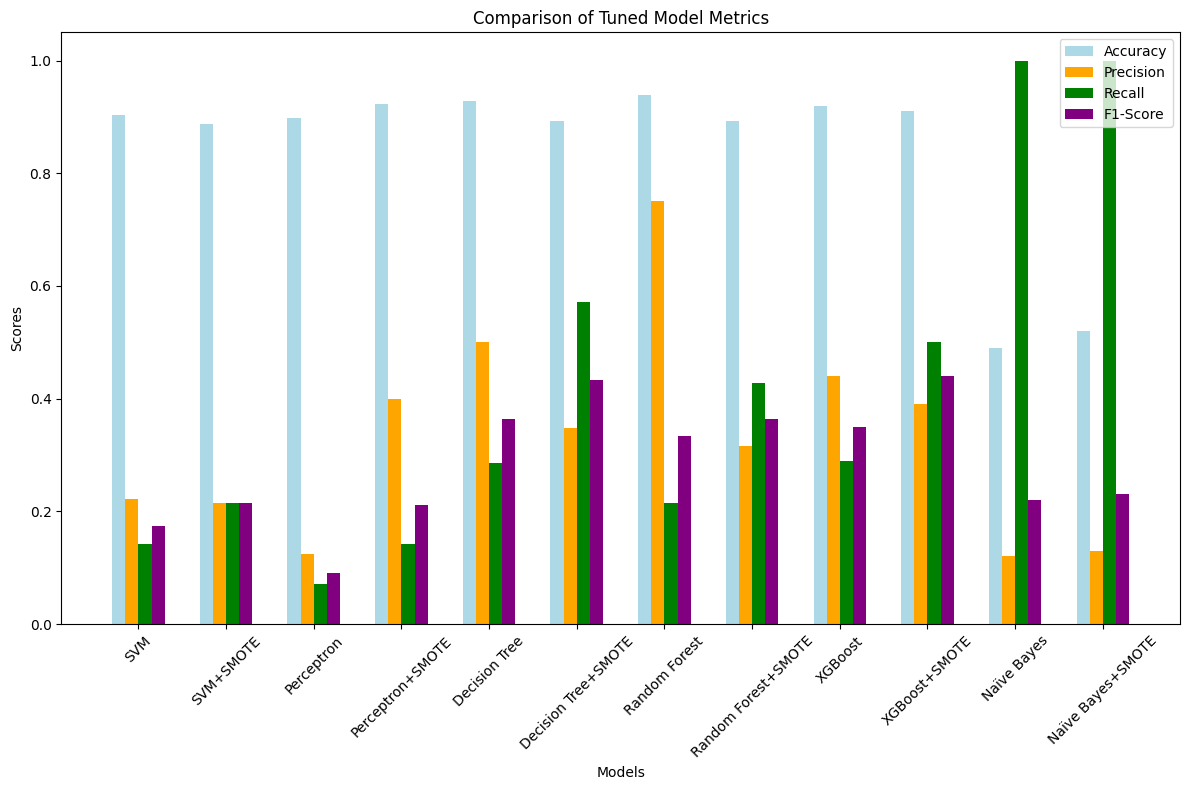

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Tuned Models
models_tuned = [
    'SVM', 'SVM+SMOTE', 'Perceptron', 'Perceptron+SMOTE',
    'Decision Tree', 'Decision Tree+SMOTE', 'Random Forest', 'Random Forest+SMOTE',
    'XGBoost', 'XGBoost+SMOTE', 'Naïve Bayes', 'Naïve Bayes+SMOTE'
]
accuracy_tuned = [0.9030, 0.8877, 0.8979, 0.9234, 0.9285, 0.8928, 0.9387, 0.8928, 0.92, 0.91, 0.49, 0.52]
precision_tuned = [0.2222, 0.2142, 0.1250, 0.4000, 0.5000, 0.3478, 0.7500, 0.3157, 0.44, 0.39, 0.12, 0.13]
recall_tuned = [0.1428, 0.2142, 0.0714, 0.1428, 0.2857, 0.5714, 0.2142, 0.4285, 0.29, 0.50, 1.00, 1.00]
f1score_tuned = [0.1739, 0.2142, 0.0909, 0.2105, 0.3636, 0.4324, 0.3333, 0.3636, 0.35, 0.44, 0.22, 0.23]

x_tuned = np.arange(len(models_tuned))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
ax.bar(x_tuned - 1.5*width, accuracy_tuned, width, label='Accuracy', color='lightblue')
ax.bar(x_tuned - 0.5*width, precision_tuned, width, label='Precision', color='orange')
ax.bar(x_tuned + 0.5*width, recall_tuned, width, label='Recall', color='green')
ax.bar(x_tuned + 1.5*width, f1score_tuned, width, label='F1-Score', color='purple')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Tuned Model Metrics')
ax.set_xticks(x_tuned)
ax.set_xticklabels(models_tuned, rotation=45)
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()


Visualization for Tuned Models without and with smote using RandomSearch


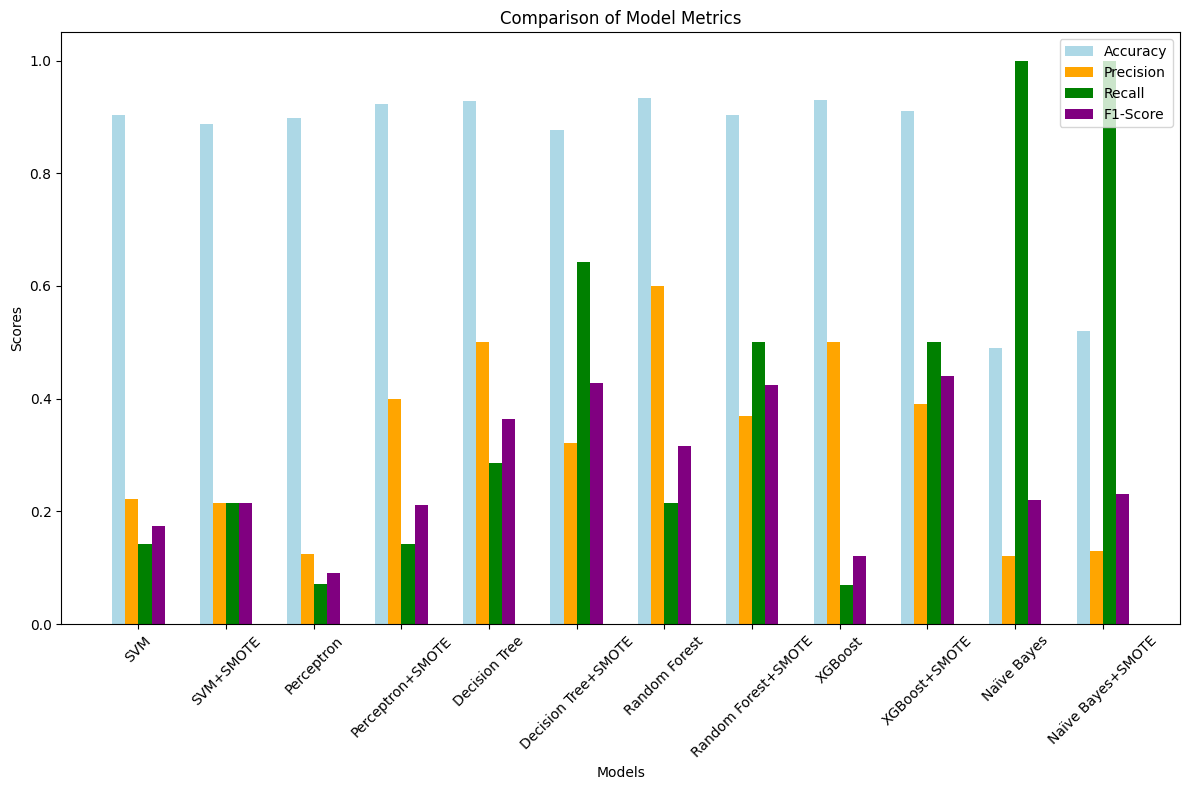

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the new set of models
models_new = [
    'SVM', 'SVM+SMOTE', 'Perceptron', 'Perceptron+SMOTE',
    'Decision Tree', 'Decision Tree+SMOTE', 'Random Forest', 'Random Forest+SMOTE',
    'XGBoost', 'XGBoost+SMOTE', 'Naïve Bayes', 'Naïve Bayes+SMOTE'
]
accuracy_new = [0.9030, 0.8877, 0.8979, 0.9234, 0.9285, 0.8775, 0.9336, 0.9030, 0.93, 0.91, 0.49, 0.52]
precision_new = [0.2222, 0.2142, 0.125, 0.4000, 0.5000, 0.3214, 0.6000, 0.3684, 0.50, 0.39, 0.12, 0.13]
recall_new = [0.1428, 0.2142, 0.0714, 0.1428, 0.2857, 0.6428, 0.2142, 0.5000, 0.07, 0.50, 1.00, 1.00]
f1score_new = [0.1739, 0.2142, 0.0909, 0.2105, 0.3636, 0.4285, 0.3157, 0.4242, 0.12, 0.44, 0.22, 0.23]

x_new = np.arange(len(models_new))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
ax.bar(x_new - 1.5*width, accuracy_new, width, label='Accuracy', color='lightblue')
ax.bar(x_new - 0.5*width, precision_new, width, label='Precision', color='orange')
ax.bar(x_new + 0.5*width, recall_new, width, label='Recall', color='green')
ax.bar(x_new + 1.5*width, f1score_new, width, label='F1-Score', color='purple')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x_new)
ax.set_xticklabels(models_new, rotation=45)
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()
